In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
# Step 2: Load Dataset

df = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/Python/HousePrediction.csv")

In [3]:
print("Dataset Shape:", df.shape)
print("First 5 rows:\n", df.head())

Dataset Shape: (2919, 13)
First 5 rows:
    Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [4]:
# Step 3: Basic Exploration

print("Missing Values:\n", df.isnull().sum())
print("Numerical Features:\n", df.select_dtypes(include=[np.number]).columns)
print("Categorical Features:\n", df.select_dtypes(exclude=[np.number]).columns)

Missing Values:
 Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64
Numerical Features:
 Index(['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice'],
      dtype='object')
Categorical Features:
 Index(['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'], dtype='object')


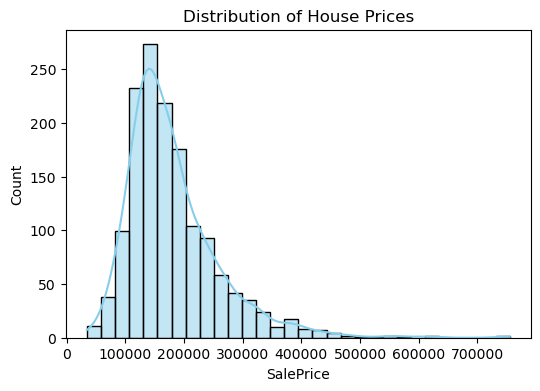

<Figure size 640x480 with 0 Axes>

In [5]:
# Step 4: Visualization
plt.figure(figsize=(6,4))
sns.histplot(df['SalePrice'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of House Prices")
plt.savefig("visuals/saleprice_distribution.png")
plt.show()
plt.savefig("saleprice_distribution.png")

In [6]:
import os
os.makedirs("visuals", exist_ok=True)

In [7]:
# Step 5: Feature Engineering
df['HouseAge'] = 2025 - df['YearBuilt']
df['RemodAge'] = 2025 - df['YearRemodAdd']


In [8]:
# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)


In [9]:
# Step 6: Define Features & Target
X = df[['LotArea','OverallCond','TotalBsmtSF','HouseAge','RemodAge','MSZoning','BldgType']]
y = df['SalePrice']

In [10]:
# Step 7: Preprocessing
numeric_features = ['LotArea','OverallCond','TotalBsmtSF','HouseAge','RemodAge']
categorical_features = ['MSZoning','BldgType']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [11]:
# Step 8: Model Training
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['LotArea', 'OverallCond',
                                                   'TotalBsmtSF', 'HouseAge',
                                                   'RemodAge']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MSZoning', 'BldgType'])])),
                ('regressor', LinearRegression())])

In [12]:
# Step 1: Calculate missing values for each column
missing_values = df.isnull().sum()

# Step 2: Filter only columns with NaN values
missing_features = missing_values[missing_values > 0].sort_values(ascending=False)

# Step 3: Display results
print("Features with Missing Values:\n")
print(missing_features)

# Optional: Percentage of missing values
missing_percentage = (missing_features / len(df)) * 100
print("\nPercentage of Missing Values:\n")
print(missing_percentage)

Features with Missing Values:

MSZoning       4
Exterior1st    1
dtype: int64

Percentage of Missing Values:

MSZoning       0.137033
Exterior1st    0.034258
dtype: float64


In [13]:
# Identify features with missing values
missing_features = df.columns[df.isnull().any()]

print("Features with missing values:", list(missing_features))

# Calculate mean SalePrice for missing vs present
for feature in missing_features:
    mean_missing = df[df[feature].isnull()]['SalePrice'].mean()
    mean_present = df[df[feature].notnull()]['SalePrice'].mean()
    
    print(f"\nFeature: {feature}")
    print(f"Mean SalePrice (Missing): {mean_missing}")
    print(f"Mean SalePrice (Present): {mean_present}")

Features with missing values: ['MSZoning', 'Exterior1st']

Feature: MSZoning
Mean SalePrice (Missing): 163000.0
Mean SalePrice (Present): 171975.96775300172

Feature: Exterior1st
Mean SalePrice (Missing): 163000.0
Mean SalePrice (Present): 171966.73954763537


In [14]:
# Select numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Count numerical features
num_count = len(numerical_features)

print("Numerical Features Count:", num_count)
print("\nList of Numerical Features:\n", list(numerical_features))

Numerical Features Count: 11

List of Numerical Features:
 ['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice', 'HouseAge', 'RemodAge']


In [15]:
# Select only numerical features (int and float types)
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# Display the first five rows
print("First Five Rows of Numerical Features:\n")
print(numerical_features.head())

First Five Rows of Numerical Features:

   Id  MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
0   0          60     8450            5       2003          2003         0.0   
1   1          20     9600            8       1976          1976         0.0   
2   2          60    11250            5       2001          2002         0.0   
3   3          70     9550            5       1915          1970         0.0   
4   4          60    14260            5       2000          2000         0.0   

   TotalBsmtSF  SalePrice  HouseAge  RemodAge  
0        856.0   208500.0        22        22  
1       1262.0   181500.0        49        49  
2        920.0   223500.0        24        23  
3        756.0   140000.0       110        55  
4       1145.0   250000.0        25        25  


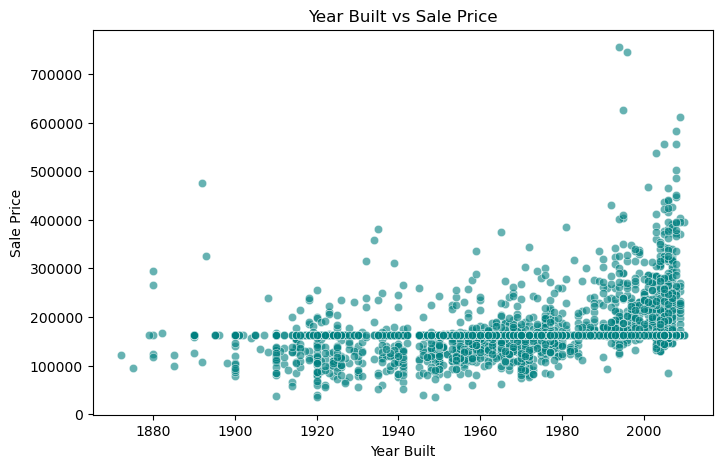

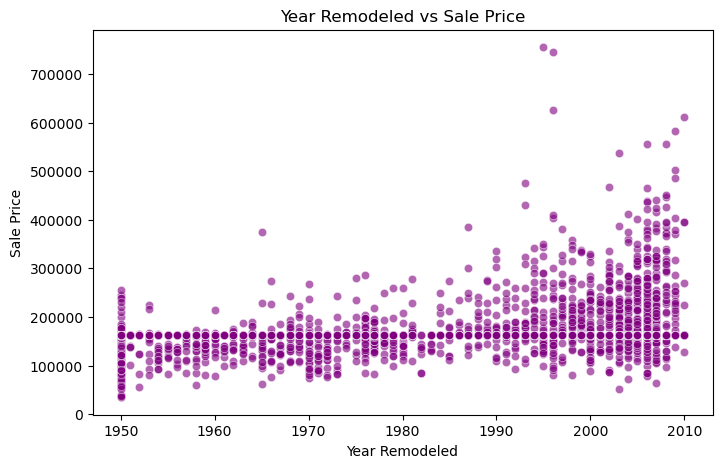


Correlation with SalePrice:
YearBuilt: 0.3638253544403755
YearRemodAdd: 0.3544137557280812
HouseAge: -0.36382535444037556
RemodAge: -0.3544137557280813


In [16]:
# Scatterplot: YearBuilt vs SalePrice
plt.figure(figsize=(8,5))
sns.scatterplot(x="YearBuilt", y="SalePrice", data=df, alpha=0.6, color="teal")
plt.title("Year Built vs Sale Price")
plt.xlabel("Year Built")
plt.ylabel("Sale Price")
plt.savefig("visuals/yearbuilt_saleprice.png")
plt.show()

# Scatterplot: YearRemodAdd vs SalePrice
plt.figure(figsize=(8,5))
sns.scatterplot(x="YearRemodAdd", y="SalePrice", data=df, alpha=0.6, color="purple")
plt.title("Year Remodeled vs Sale Price")
plt.xlabel("Year Remodeled")
plt.ylabel("Sale Price")
plt.savefig("visuals/yearremod_saleprice.png")
plt.show()

# Optional: Create new features for age
df['HouseAge'] = 2025 - df['YearBuilt']
df['RemodAge'] = 2025 - df['YearRemodAdd']

print("\nCorrelation with SalePrice:")
print("YearBuilt:", df['YearBuilt'].corr(df['SalePrice']))
print("YearRemodAdd:", df['YearRemodAdd'].corr(df['SalePrice']))
print("HouseAge:", df['HouseAge'].corr(df['SalePrice']))
print("RemodAge:", df['RemodAge'].corr(df['SalePrice']))

Mean SalePrice by Overall Condition:
 OverallCond
1    148428.571429
2    152493.200000
3    132464.700000
4    138980.108911
5    183036.849240
6    158710.585687
7    160448.269231
8    159325.868056
9    191441.463415
Name: SalePrice, dtype: float64


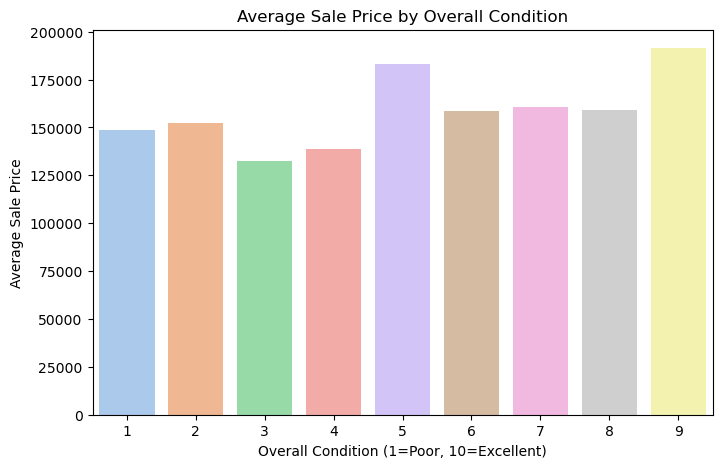


Mean SalePrice by MSSubClass:
 MSSubClass
20     174040.314180
30     129656.482014
40     158416.666667
45     126727.777778
50     153117.170732
60     203013.220870
70     164768.320312
75     183478.260870
80     166311.186441
85     156670.833333
90     148946.201835
120    181059.230769
150    163000.000000
160    151013.945312
180    127294.117647
190    146580.327869
Name: SalePrice, dtype: float64


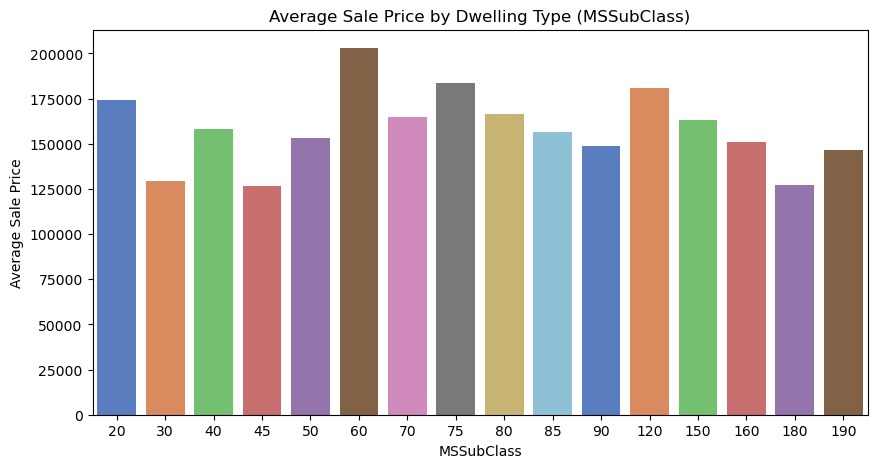

In [17]:
# --- OverallCond vs SalePrice ---
cond_mean = df.groupby("OverallCond")["SalePrice"].mean().sort_index()
print("Mean SalePrice by Overall Condition:\n", cond_mean)

plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x="OverallCond",
    y="SalePrice",
    hue="OverallCond",       # tie palette to discrete variable
    palette="pastel",
    errorbar=None,           # replaces ci=None
    legend=False             # hide duplicate legend
)
plt.title("Average Sale Price by Overall Condition")
plt.xlabel("Overall Condition (1=Poor, 10=Excellent)")
plt.ylabel("Average Sale Price")
plt.savefig("visuals/overallcond_saleprice.png")
plt.show()

# --- MSSubClass vs SalePrice ---
subclass_mean = df.groupby("MSSubClass")["SalePrice"].mean().sort_index()
print("\nMean SalePrice by MSSubClass:\n", subclass_mean)

plt.figure(figsize=(10,5))
sns.barplot(
    data=df,
    x="MSSubClass",
    y="SalePrice",
    hue="MSSubClass",        # tie palette to discrete variable
    palette="muted",
    errorbar=None,
    legend=False
)
plt.title("Average Sale Price by Dwelling Type (MSSubClass)")
plt.xlabel("MSSubClass")
plt.ylabel("Average Sale Price")
plt.savefig("visuals/mssubclass_saleprice.png")
plt.show()

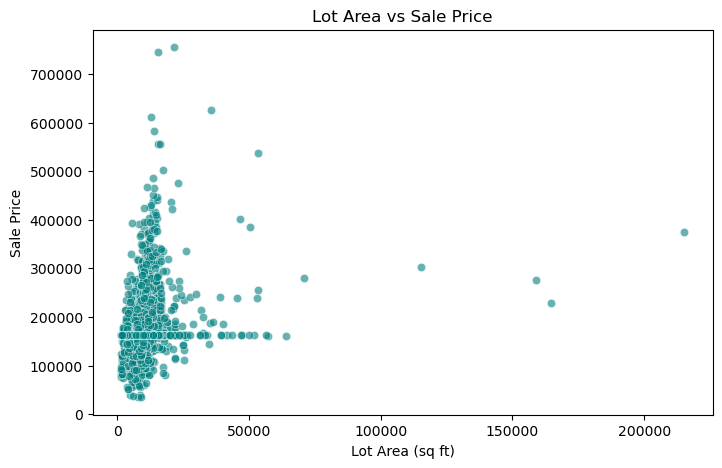

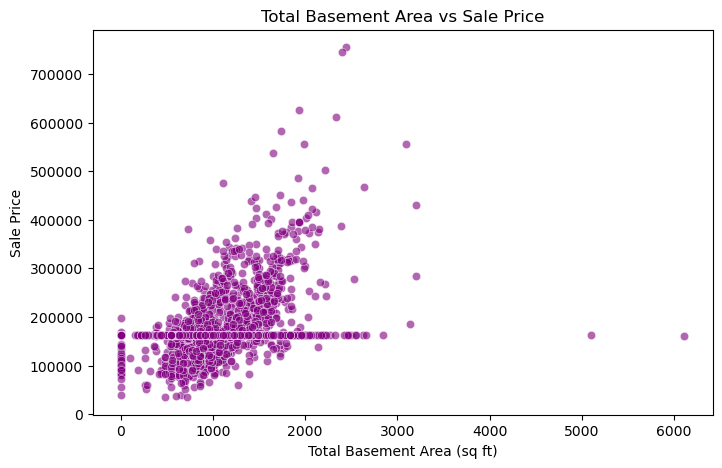


Correlation with SalePrice:
LotArea: 0.240
TotalBsmtSF: 0.429


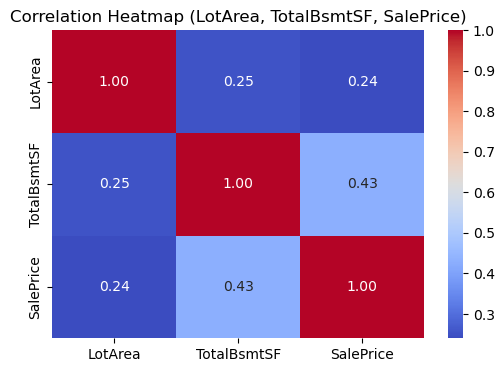

In [18]:
# --- Scatterplot: LotArea vs SalePrice ---
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x="LotArea",
    y="SalePrice",
    alpha=0.6,
    color="teal"
)
plt.title("Lot Area vs Sale Price")
plt.xlabel("Lot Area (sq ft)")
plt.ylabel("Sale Price")
plt.savefig("visuals/lotarea_saleprice.png")
plt.show()

# --- Scatterplot: TotalBsmtSF vs SalePrice ---
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x="TotalBsmtSF",
    y="SalePrice",
    alpha=0.6,
    color="purple"
)
plt.title("Total Basement Area vs Sale Price")
plt.xlabel("Total Basement Area (sq ft)")
plt.ylabel("Sale Price")
plt.savefig("visuals/totalbsmt_saleprice.png")
plt.show()

# --- Correlation Analysis ---
corr_lotarea = df['LotArea'].corr(df['SalePrice'])
corr_bsmt = df['TotalBsmtSF'].corr(df['SalePrice'])

print("\nCorrelation with SalePrice:")
print(f"LotArea: {corr_lotarea:.3f}")
print(f"TotalBsmtSF: {corr_bsmt:.3f}")

# --- Optional: Heatmap of correlations for all continuous features ---
continuous_features = ['LotArea','TotalBsmtSF','SalePrice']
plt.figure(figsize=(6,4))
sns.heatmap(df[continuous_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (LotArea, TotalBsmtSF, SalePrice)")
plt.savefig("visuals/continuous_corr_heatmap.png")
plt.show()

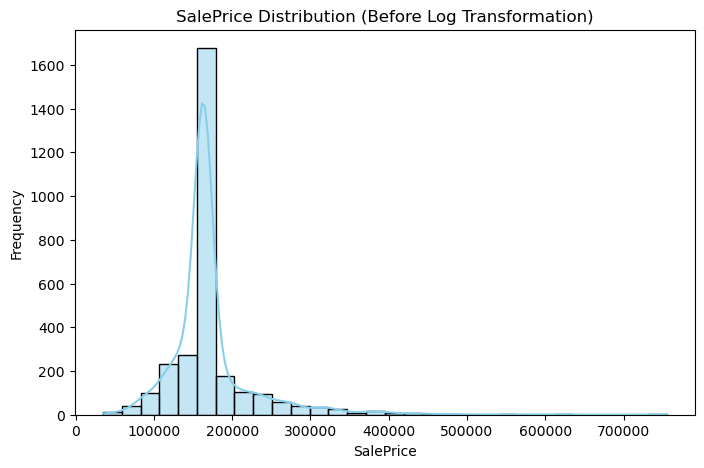

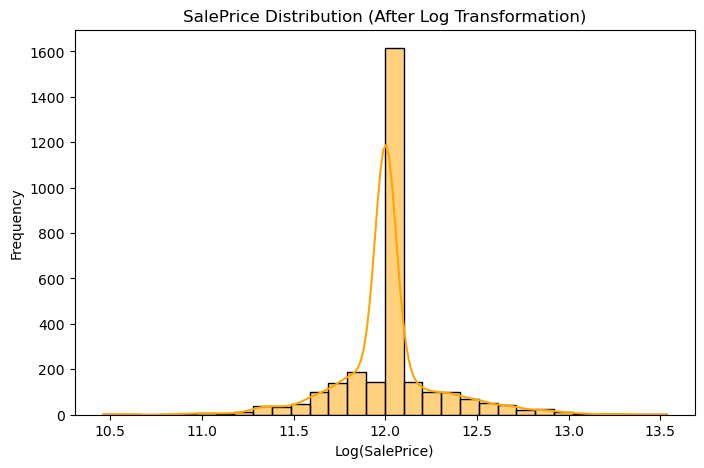

Skewness before log: 3.023498299566167
Skewness after log: 0.29057058982163547


In [19]:
# --- Histogram before log transformation ---
plt.figure(figsize=(8,5))
sns.histplot(df['SalePrice'], bins=30, kde=True, color="skyblue")
plt.title("SalePrice Distribution (Before Log Transformation)")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.savefig("visuals/saleprice_before_log.png")
plt.show()

# --- Apply log transformation ---
df['SalePrice_Log'] = np.log1p(df['SalePrice'])   # log1p handles zero safely

# --- Histogram after log transformation ---
plt.figure(figsize=(8,5))
sns.histplot(df['SalePrice_Log'], bins=30, kde=True, color="orange")
plt.title("SalePrice Distribution (After Log Transformation)")
plt.xlabel("Log(SalePrice)")
plt.ylabel("Frequency")
plt.savefig("visuals/saleprice_after_log.png")
plt.show()

# --- Compare skewness ---
print("Skewness before log:", df['SalePrice'].skew())
print("Skewness after log:", df['SalePrice_Log'].skew())

#-----Feature Engineering and Advanced Analysis

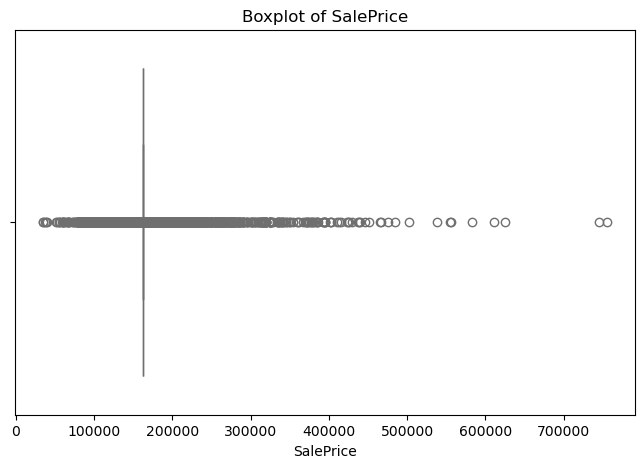

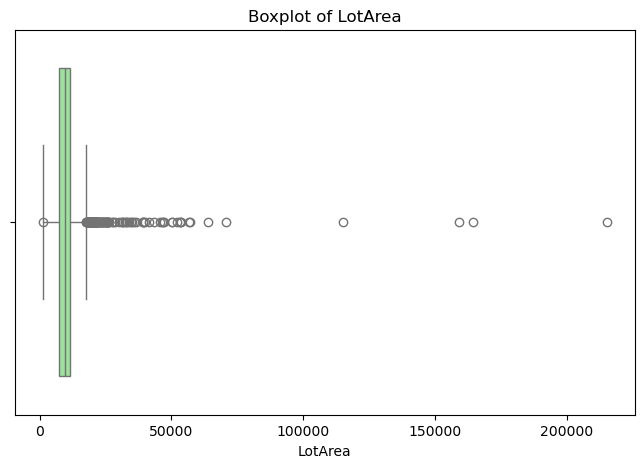

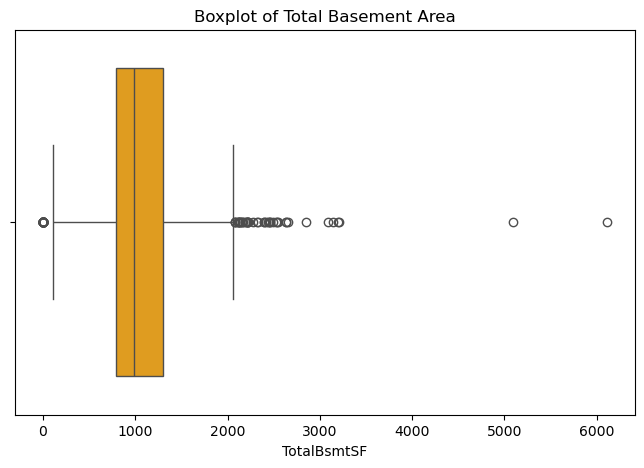


Feature: SalePrice
Outlier count: 1456
Outlier percentage: 49.88%

Feature: LotArea
Outlier count: 128
Outlier percentage: 4.39%

Feature: TotalBsmtSF
Outlier count: 122
Outlier percentage: 4.18%


In [21]:
# --- Boxplot for SalePrice ---
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="SalePrice", color="skyblue")
plt.title("Boxplot of SalePrice")
plt.savefig("visuals/saleprice_boxplot.png")
plt.show()

# --- Boxplot for LotArea ---
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="LotArea", color="lightgreen")
plt.title("Boxplot of LotArea")
plt.savefig("visuals/lotarea_boxplot.png")
plt.show()

# --- Boxplot for TotalBsmtSF ---
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="TotalBsmtSF", color="orange")
plt.title("Boxplot of Total Basement Area")
plt.savefig("visuals/totalbsmt_boxplot.png")
plt.show()

# --- Statistical Outlier Detection using IQR ---
def detect_outliers(feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"\nFeature: {feature}")
    print(f"Outlier count: {len(outliers)}")
    print(f"Outlier percentage: {len(outliers)/len(df)*100:.2f}%")
    return outliers

# Detect outliers for key features
outliers_saleprice = detect_outliers("SalePrice")
outliers_lotarea = detect_outliers("LotArea")
outliers_bsmt = detect_outliers("TotalBsmtSF")

Mean SalePrice by MSZoning:
 MSZoning
C (all)    127611.200000
RH         143651.307692
RM         145615.367391
RL         177231.235762
FV         186855.496403
Name: SalePrice, dtype: float64


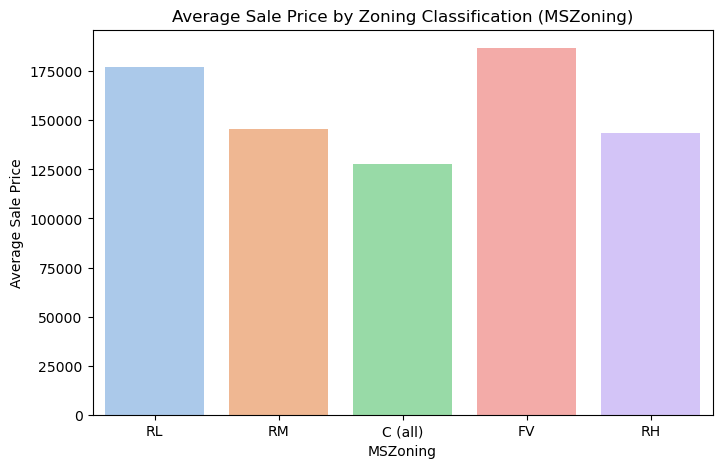


Mean SalePrice by BldgType:
 BldgType
2fmCon    145716.129032
Duplex    148946.201835
Twnhs     150866.666667
TwnhsE    172521.431718
1Fam      174452.307216
Name: SalePrice, dtype: float64


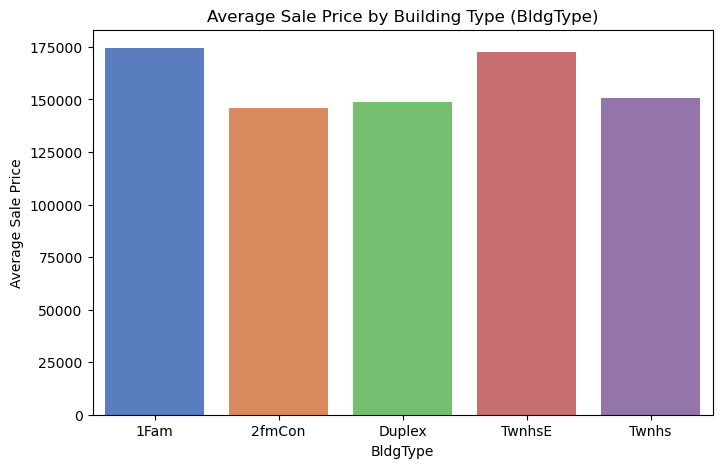

In [22]:
# --- GroupBy Analysis for MSZoning ---
zoning_mean = df.groupby("MSZoning")["SalePrice"].mean().sort_values()
print("Mean SalePrice by MSZoning:\n", zoning_mean)

plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x="MSZoning",
    y="SalePrice",
    hue="MSZoning",       # tie palette to categorical variable
    palette="pastel",
    errorbar=None,
    legend=False
)
plt.title("Average Sale Price by Zoning Classification (MSZoning)")
plt.xlabel("MSZoning")
plt.ylabel("Average Sale Price")
plt.savefig("visuals/mszoning_saleprice.png")
plt.show()

# --- GroupBy Analysis for BldgType ---
bldg_mean = df.groupby("BldgType")["SalePrice"].mean().sort_values()
print("\nMean SalePrice by BldgType:\n", bldg_mean)

plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x="BldgType",
    y="SalePrice",
    hue="BldgType",
    palette="muted",
    errorbar=None,
    legend=False
)
plt.title("Average Sale Price by Building Type (BldgType)")
plt.xlabel("BldgType")
plt.ylabel("Average Sale Price")
plt.savefig("visuals/bldgtype_saleprice.png")
plt.show()

Correlation of Numerical Features with SalePrice:

SalePrice        1.000000
SalePrice_Log    0.942069
TotalBsmtSF      0.428546
YearBuilt        0.363825
YearRemodAdd     0.354414
LotArea          0.240126
BsmtFinSF2      -0.010386
OverallCond     -0.052824
MSSubClass      -0.059445
Id              -0.144097
RemodAge        -0.354414
HouseAge        -0.363825
Name: SalePrice, dtype: float64


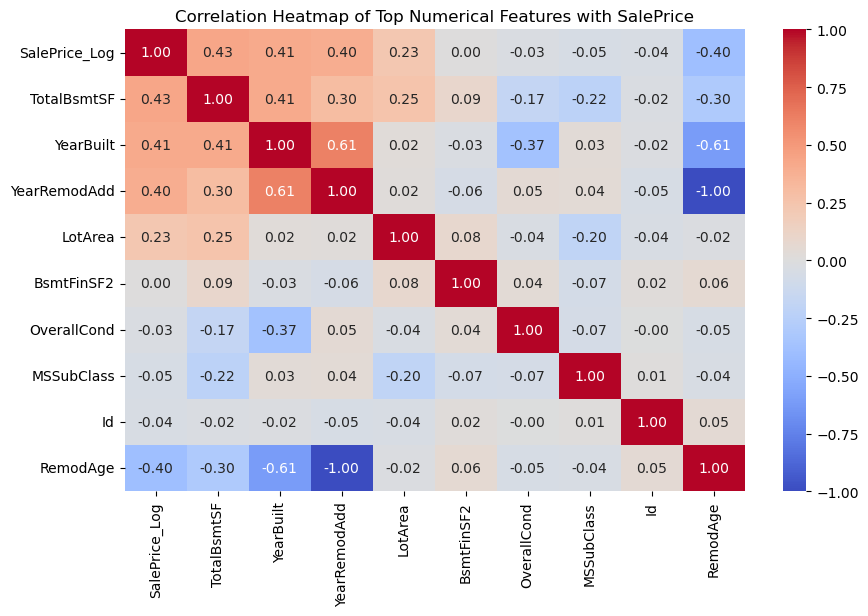

In [23]:
# --- Select numerical features ---
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# --- Pearson correlation with SalePrice ---
corr_with_saleprice = numerical_features.corr()['SalePrice'].sort_values(ascending=False)

print("Correlation of Numerical Features with SalePrice:\n")
print(corr_with_saleprice)

# --- Heatmap of top correlated features ---
top_corr_features = corr_with_saleprice.index[1:11]  # top 10 excluding SalePrice itself
plt.figure(figsize=(10,6))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Top Numerical Features with SalePrice")
plt.savefig("visuals/top_corr_heatmap.png")
plt.show()

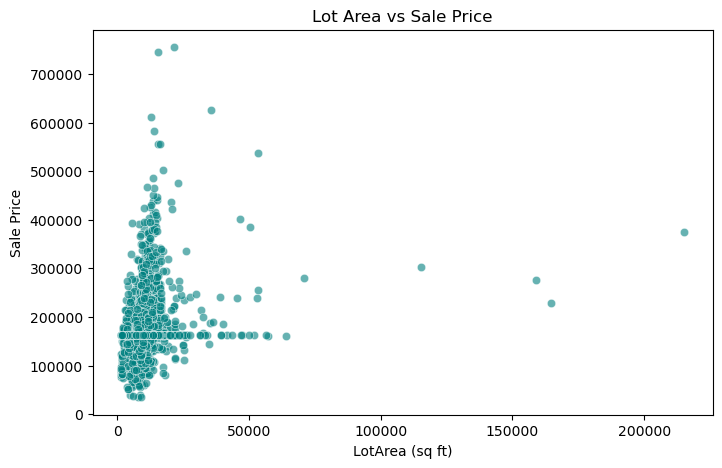

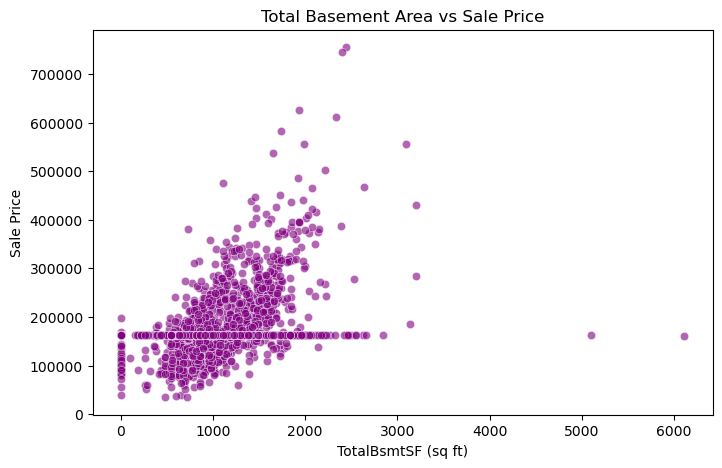

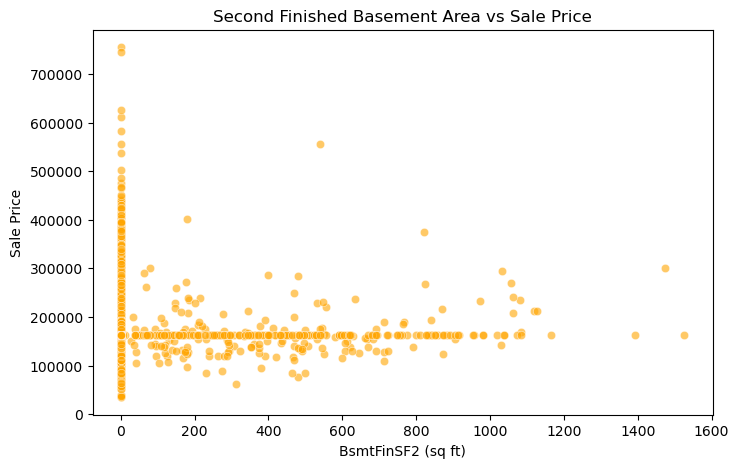

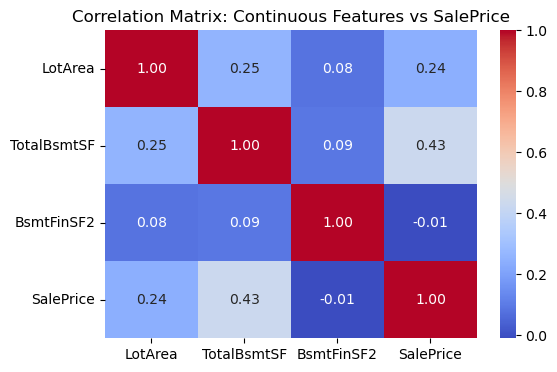

In [24]:
# --- Scatterplot: LotArea vs SalePrice ---
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="LotArea", y="SalePrice", alpha=0.6, color="teal")
plt.title("Lot Area vs Sale Price")
plt.xlabel("LotArea (sq ft)")
plt.ylabel("Sale Price")
plt.show()

# --- Scatterplot: TotalBsmtSF vs SalePrice ---
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="TotalBsmtSF", y="SalePrice", alpha=0.6, color="purple")
plt.title("Total Basement Area vs Sale Price")
plt.xlabel("TotalBsmtSF (sq ft)")
plt.ylabel("Sale Price")
plt.show()

# --- Scatterplot: BsmtFinSF2 vs SalePrice ---
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="BsmtFinSF2", y="SalePrice", alpha=0.6, color="orange")
plt.title("Second Finished Basement Area vs Sale Price")
plt.xlabel("BsmtFinSF2 (sq ft)")
plt.ylabel("Sale Price")
plt.show()

# --- Correlation Matrix for Continuous Features ---
continuous_features = ['LotArea','TotalBsmtSF','BsmtFinSF2','SalePrice']
plt.figure(figsize=(6,4))
sns.heatmap(df[continuous_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Continuous Features vs SalePrice")
plt.show()

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# --- 1. Handle Missing Values ---
num_features = df.select_dtypes(include=['int64','float64']).columns
for feature in num_features:
    df[feature] = df[feature].fillna(df[feature].mean())

cat_features = df.select_dtypes(include=['object']).columns
for feature in cat_features:
    df[feature] = df[feature].fillna(df[feature].mode()[0])

# --- 2. Handle Categorical Variables ---
# Label encode one categorical (example: MSZoning)
if 'MSZoning' in df.columns:
    le = LabelEncoder()
    df['MSZoning'] = le.fit_transform(df['MSZoning'])

# One-hot encode ALL remaining categorical features
df = pd.get_dummies(df, columns=cat_features.drop('MSZoning', errors='ignore'), drop_first=True)

# --- 3. Handle Numerical Variables ---
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

# --- 4. Handling Temporal Variables ---
current_year = 2025
if 'YearBuilt' in df.columns:
    df['HouseAge'] = current_year - df['YearBuilt']
if 'YearRemodAdd' in df.columns:
    df['RemodAge'] = current_year - df['YearRemodAdd']

Mean SalePrice by MSZoning:
 MSZoning
C (all)     74528.000000
RM         126316.830275
RH         131558.375000
RL         191004.994787
FV         214014.061538
Name: SalePrice, dtype: float64


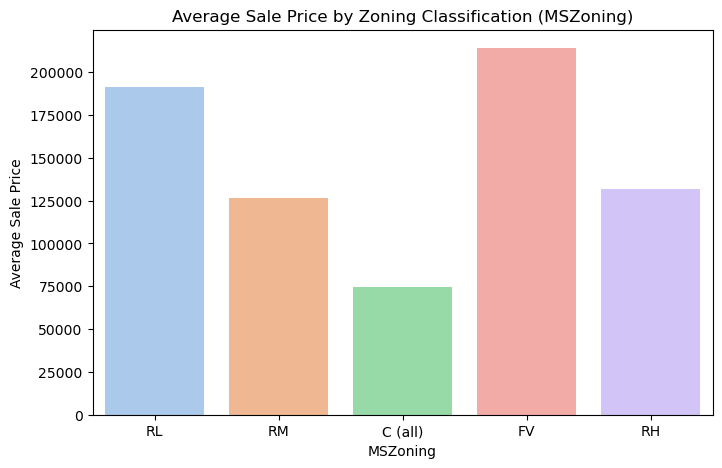


Mean SalePrice by LotConfig:
 LotConfig
Inside     176938.047529
FR2        177934.574468
Corner     181623.425856
FR3        208475.000000
CulDSac    223854.617021
Name: SalePrice, dtype: float64


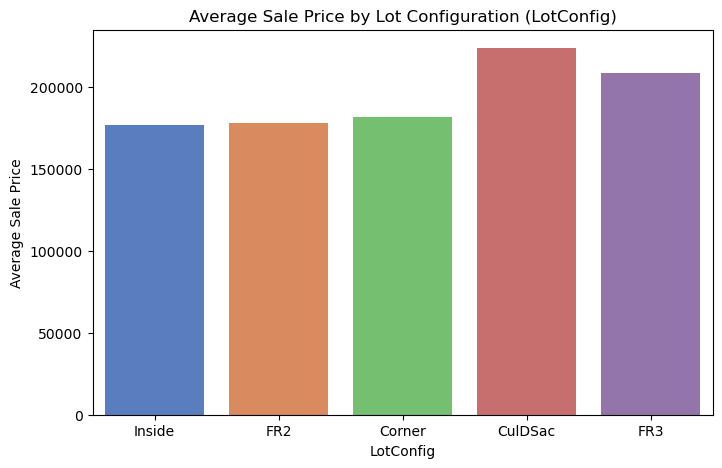

In [26]:
# Load raw dataset for exploration
df_raw = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/Python/HousePrediction.csv")

# --- GroupBy Analysis for MSZoning ---
zoning_mean = df_raw.groupby("MSZoning")["SalePrice"].mean().sort_values()
print("Mean SalePrice by MSZoning:\n", zoning_mean)

plt.figure(figsize=(8,5))
sns.barplot(
    data=df_raw,
    x="MSZoning",
    y="SalePrice",
    hue="MSZoning",
    palette="pastel",
    errorbar=None,
    legend=False
)
plt.title("Average Sale Price by Zoning Classification (MSZoning)")
plt.xlabel("MSZoning")
plt.ylabel("Average Sale Price")
plt.savefig("visuals/mszoning_saleprice.png")
plt.show()

# --- GroupBy Analysis for LotConfig ---
lot_mean = df_raw.groupby("LotConfig")["SalePrice"].mean().sort_values()
print("\nMean SalePrice by LotConfig:\n", lot_mean)

plt.figure(figsize=(8,5))
sns.barplot(
    data=df_raw,
    x="LotConfig",
    y="SalePrice",
    hue="LotConfig",
    palette="muted",
    errorbar=None,
    legend=False
)
plt.title("Average Sale Price by Lot Configuration (LotConfig)")
plt.xlabel("LotConfig")
plt.ylabel("Average Sale Price")
plt.savefig("visuals/lotconfig_saleprice.png")
plt.show()

Mean SalePrice by Overall Condition:
 OverallCond
1     61000.000000
2    141986.400000
3    101929.400000
4    120438.438596
5    203146.914738
6    153961.591270
7    158145.487805
8    155651.736111
9    216004.545455
Name: SalePrice, dtype: float64


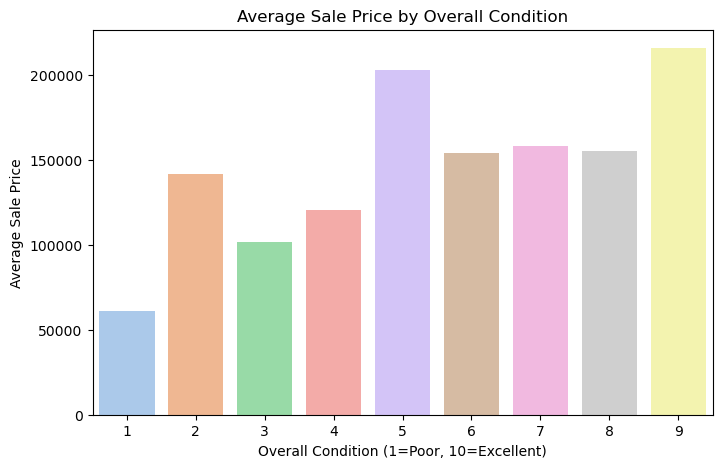

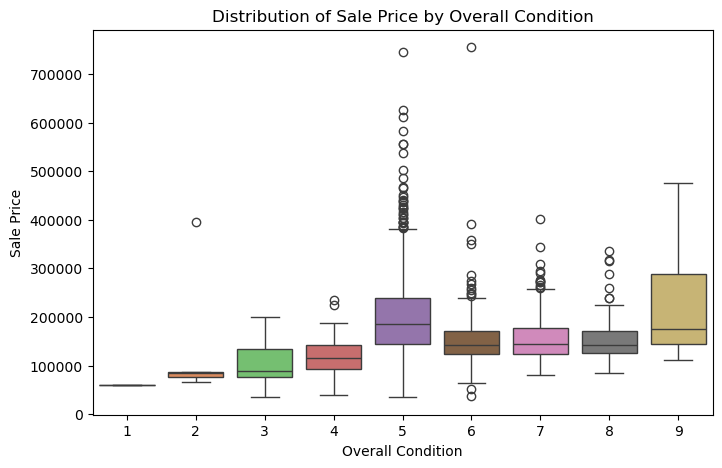

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure visuals folder exists
os.makedirs("visuals", exist_ok=True)


# --- GroupBy Analysis ---
cond_mean = df_raw.groupby("OverallCond")["SalePrice"].mean().sort_index()
print("Mean SalePrice by Overall Condition:\n", cond_mean)

# --- Barplot ---
plt.figure(figsize=(8,5))
sns.barplot(
    data=df_raw,
    x="OverallCond",
    y="SalePrice",
    hue="OverallCond",
    palette="pastel",
    errorbar=None,
    legend=False
)
plt.title("Average Sale Price by Overall Condition")
plt.xlabel("Overall Condition (1=Poor, 10=Excellent)")
plt.ylabel("Average Sale Price")
plt.savefig("visuals/overallcond_saleprice.png")
plt.show()

# --- Boxplot (to show spread of prices by condition) ---
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df_raw,
    x="OverallCond",
    y="SalePrice",
    hue="OverallCond",   # tie palette to the categorical variable
    palette="muted",
    legend=False         # avoid duplicate legend
)
plt.title("Distribution of Sale Price by Overall Condition")
plt.xlabel("Overall Condition")
plt.ylabel("Sale Price")
plt.savefig("visuals/overallcond_boxplot.png")
plt.show()

Average SalePrice by Basement Presence:
 HasBasement
0    105652.891892
1    182878.277583
Name: SalePrice, dtype: float64


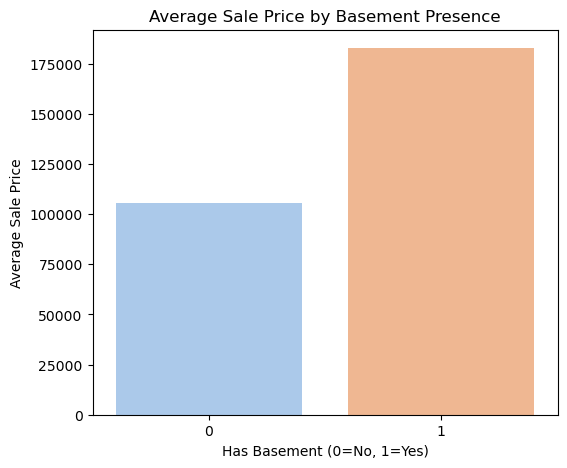

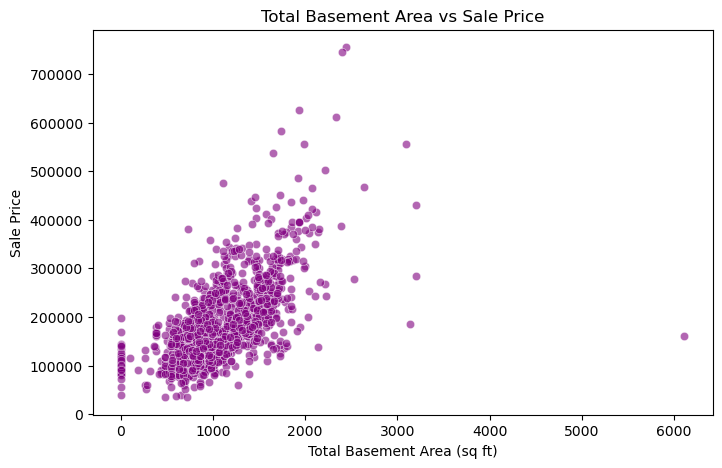

Correlation between TotalBsmtSF and SalePrice: 0.614


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure visuals folder exists
os.makedirs("visuals", exist_ok=True)


# --- Create a binary feature: Basement presence ---
df_raw['HasBasement'] = df_raw['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

# --- GroupBy Analysis ---
basement_mean = df_raw.groupby("HasBasement")["SalePrice"].mean()
print("Average SalePrice by Basement Presence:\n", basement_mean)

# --- Barplot: Basement Presence vs SalePrice ---
plt.figure(figsize=(6,5))
sns.barplot(
    data=df_raw,
    x="HasBasement",
    y="SalePrice",
    hue="HasBasement",
    palette="pastel",
    errorbar=None,
    legend=False
)
plt.title("Average Sale Price by Basement Presence")
plt.xlabel("Has Basement (0=No, 1=Yes)")
plt.ylabel("Average Sale Price")
plt.savefig("visuals/basement_presence_saleprice.png")
plt.show()

# --- Scatterplot: Basement Size vs SalePrice ---
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_raw,
    x="TotalBsmtSF",
    y="SalePrice",
    alpha=0.6,
    color="purple"
)
plt.title("Total Basement Area vs Sale Price")
plt.xlabel("Total Basement Area (sq ft)")
plt.ylabel("Sale Price")
plt.savefig("visuals/totalbsmt_saleprice.png")
plt.show()

# --- Correlation ---
corr_bsmt = df_raw['TotalBsmtSF'].corr(df_raw['SalePrice'])
print(f"Correlation between TotalBsmtSF and SalePrice: {corr_bsmt:.3f}")

Average SalePrice by Year of Remodeling:
 YearRemodAdd
1950    117463.056180
1951    129975.000000
1952    110398.600000
1953    147640.000000
1954    121142.857143
Name: SalePrice, dtype: float64


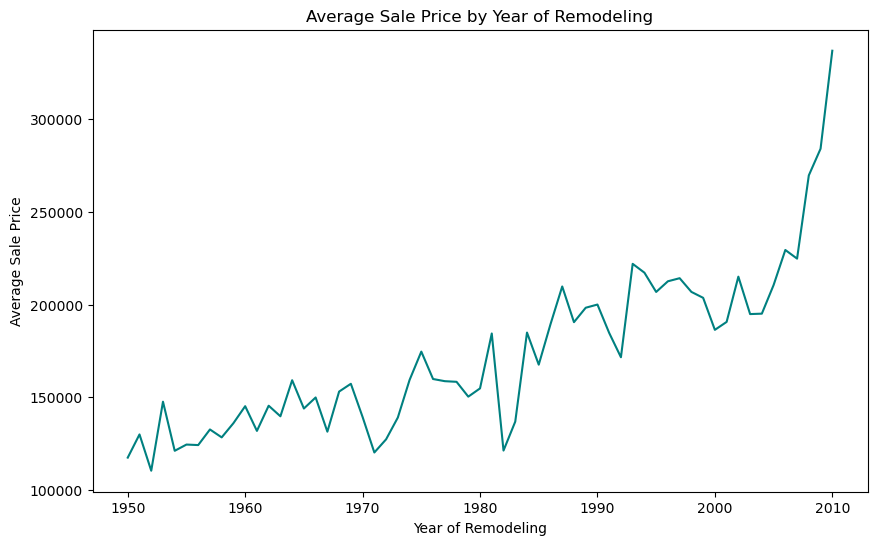

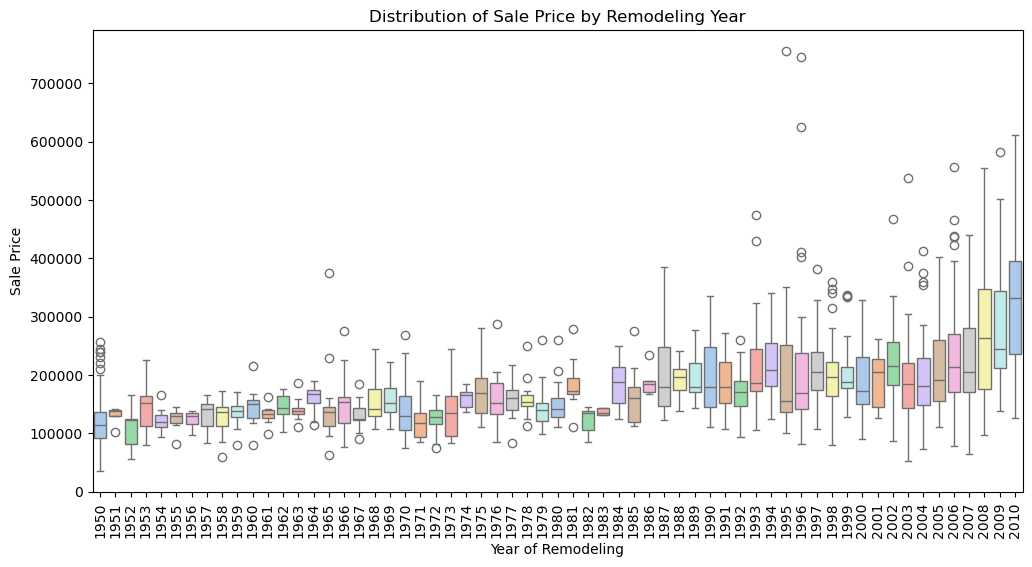

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure visuals folder exists
os.makedirs("visuals", exist_ok=True)


# --- GroupBy Analysis ---
remod_mean = df_raw.groupby("YearRemodAdd")["SalePrice"].mean()
print("Average SalePrice by Year of Remodeling:\n", remod_mean.head())

# --- Lineplot: YearRemodAdd vs SalePrice ---
plt.figure(figsize=(10,6))
sns.lineplot(
    data=df_raw,
    x="YearRemodAdd",
    y="SalePrice",
    errorbar=None,   # replaces ci=None
    color="teal"
)
plt.title("Average Sale Price by Year of Remodeling")
plt.xlabel("Year of Remodeling")
plt.ylabel("Average Sale Price")
plt.savefig("visuals/remod_lineplot.png")
plt.show()

# --- Boxplot: Distribution of SalePrice by Remodeling Year ---
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_raw,
    x="YearRemodAdd",
    y="SalePrice",
    hue="YearRemodAdd",   # tie palette to the categorical variable
    palette="pastel",
    legend=False          # avoids duplicate legend
)
plt.xticks(rotation=90)
plt.title("Distribution of Sale Price by Remodeling Year")
plt.xlabel("Year of Remodeling")
plt.ylabel("Sale Price")
plt.savefig("visuals/remod_boxplot.png")
plt.show()

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error


# Drop rows where SalePrice is missing
df_raw = df_raw.dropna(subset=['SalePrice'])

# Select categorical features
cat_features = [col for col in ['BldgType', 'Exterior1st', 'MSZoning', 'LotConfig'] if col in df_raw.columns]

# One-hot encode
df_encoded = pd.get_dummies(df_raw[cat_features], drop_first=True)

# Target variable
y = df_raw['SalePrice']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)

print("Categorical features used:", cat_features)
print("Shape of encoded dataset:", df_encoded.shape)
print("RMSE using only categorical features:", rmse)

Categorical features used: ['BldgType', 'Exterior1st', 'MSZoning', 'LotConfig']
Shape of encoded dataset: (1460, 26)
RMSE using only categorical features: 73107.46799735888
